# Heart Disease Prediciton

## Objective

To predict whether a patient is at risk for a heart attack. **This is a binary outcome.**

Positive (+) = 1, patient is at risk Negative (-) = 0, patient is not at risk

## Understanding the dataset avaliable

We have 13 features to train our model

1) age (#)

2) sex : 1 = Male, 0 = Female (Binary)

3) (cp) chest pain [type (4 values, Ordinal)]: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic

4) (trestbps) resting blood pressure (#)

5) (chol) serum cholestoral in mg/dl (#)

6) (fbs) fasting blood sugar > 120 mg/dl (Binary) [1 = true; 0 = false]

7) (restecg) resting electrocardiographic results [values 0,1,2]

8) (thalach) maximum heart rate achieved (#)

9) (exang) exercise induced angina (Binary) [1 = yes; 0 = no]

10) (oldpeak) = ST depression induced by exercise relative to rest (#)

11) (slope) of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping]

12) (ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy

13) (thal) maximum heart rate achieved (Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]

In [1]:
# Importing the necessary libraries for the project

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report #Metrics
from sklearn.model_selection import train_test_split #Train_Test_split
from sklearn.preprocessing import StandardScaler #Preprocessing Data

# Exploring the Dataset 

In [2]:
#reading the given dataset into data variable
data=pd.read_csv('data.csv')

#Renaming num as target
data.rename(columns={'num       ': 'target'}, inplace=True) 

#printing the first 10 rows of the data
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [3]:
#printing the columns and their types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

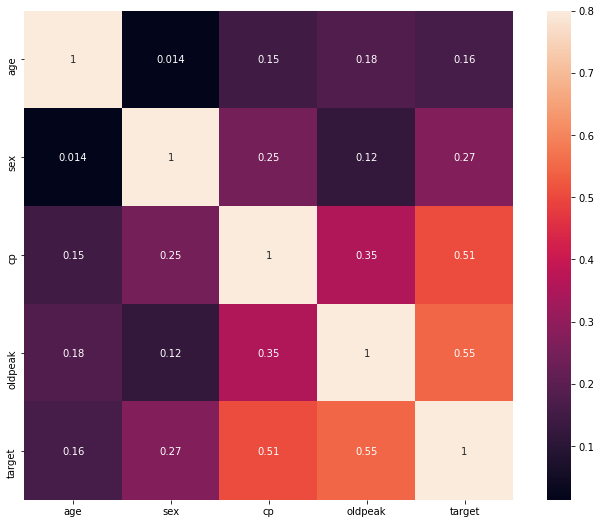

In [4]:
#Vizualizing the Data

import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

#### **OldPeak**(ST depression induced by exercise relative to rest) and **CP** ( Chest Pain Type ) have the most correlation with **target** ( diagnosis of heart disease)

# Preprocessing the Data

In [5]:
#Replacing the empty data with zeros
data=data.replace('?',None)
data=data.replace('?',0)

#printing the processed data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,243,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,6,0


In [6]:
# Getting dummies for ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] using pd.get_dummies
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Scaling the other features using standard scaler.

In [7]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

Final Preprocessed Data

In [8]:
data.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_0,slope_1,slope_2,slope_3,ca_0,ca_0,thal_0,thal_3,thal_6,thal_7
0,-2.542347,-0.148467,-1.681029,1.951999,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
1,-2.414117,-0.717561,-0.117167,0.889244,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
2,-2.414117,0.420626,-0.117167,1.314346,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
3,-2.285888,2.127905,-0.201700,1.314346,-0.646074,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,-2.157658,-1.855747,-0.455300,0.464142,-0.646074,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
5,-2.029429,-1.571200,-0.751165,1.101795,-0.646074,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
6,-2.029429,-1.286654,-0.370767,1.909489,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
7,-2.029429,-0.433014,0.037810,0.676693,-0.646074,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
8,-1.901199,-0.717561,0.657719,1.951999,-0.646074,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
9,-1.772970,-0.148467,-1.272453,2.164550,-0.646074,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0


# Splitting data as Train and Test

In [9]:
y = data['target']
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [10]:
print(X_train.shape)
print(y_train.shape)

(235, 28)
(235,)


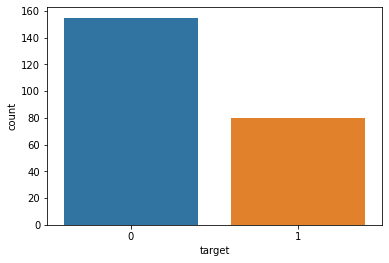

In [11]:
#Plotting the Target (Heart Disease)
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.show()

 # MODELS

1) Support Vector Machine - with various kernals

2) Logistic Regression

3) Random Forest

4) Multi-layer Perceptron classifier

## 1) Using SVM

### Running SVM model with Various Kernals

In [12]:
from sklearn.svm import SVC

svc_scores = []
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
for type in kernel_type:
    svc_classifier = SVC(kernel = type)
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

<BarContainer object of 4 artists>

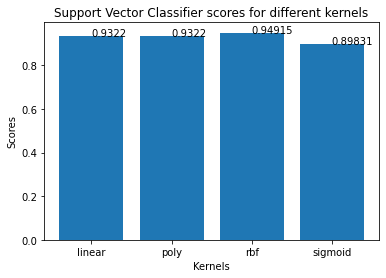

In [13]:
#Plotting the scores of the various kernals

for i in range(len(kernel_type)):
    label = round(svc_scores[i], 5)
    plt.text(i, svc_scores[i], label)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.bar(kernel_type, svc_scores)

We can see that the **Radial Basis Function** kernel gives the maximum accuracy. Training the final model in rbf

In [14]:
svc =  SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print("confussion matrix")
print(svc_conf_matrix)
print(classification_report(y_test, svc_predicted))
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')

confussion matrix
[[31  2]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.93      0.96      0.94        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



Accuracy of Support Vector Classifier: 94.91525423728814 



## 2) Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,lr_predict))
print("Accuracy of Logistic Regression: {:.3f}".format(lr_acc_score*100),'%\n')

confussion matrix
[[30  3]
 [ 0 26]]


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.90      1.00      0.95        26

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Accuracy of Logistic Regression: 94.915 %



## 3) Random Forest

In [16]:
#Trying with Random forest model

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=500,random_state=1)
model.fit(X_train,y_train)
rfpred=model.predict(X_test)
RF_conf_matrix = confusion_matrix(y_test, rfpred)
rf_acc_score = accuracy_score(y_test, rfpred)
print("confussion matrix")
print(RF_conf_matrix)
print(classification_report(y_test, rfpred))
print("\n")
print("Accuracy of Random Forest Classifier:",rf_acc_score*100,'\n')

confussion matrix
[[31  2]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      1.00      0.96        26

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



Accuracy of Random Forest Classifier: 96.61016949152543 



## 4) Multi-layer Perceptron classifier 

In [17]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(32), learning_rate_init=0.0001, max_iter=5000)
model = MLP.fit(X_train, y_train)
MLP_predict = MLP.predict(X_test)
MLP_conf_matrix = confusion_matrix(y_test, MLP_predict)
MLP_acc_score = accuracy_score(y_test, MLP_predict)
print("confussion matrix")
print(MLP_conf_matrix)
print("\n")
print(classification_report(y_test,MLP_predict))
print("Accuracy of Multilayer Perceptron classifier: {:.3f}".format(MLP_acc_score*100),'%\n')


confussion matrix
[[31  2]
 [ 2 24]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.92      0.92      0.92        26

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59

Accuracy of Multilayer Perceptron classifier: 93.220 %

